APUNTES:DFUNCION 
cv.findContours()Esta función es clave para detectar bordes y formas en imágenes binarias.
2º Parámetro: El Modo (Jerarquía)Este parámetro decide cómo se relacionan los contornos entre sí (si unos están dentro de otros).cv.RETR_LIST (El más común)Significado: "Dame una lista plana de todos los contornos que veas. No me importa quién está dentro de quién".Resultado: Te devuelve todos los bordes por igual (ej: el borde exterior de una rosquilla y el agujero interior son dos elementos independientes). No distingue "padres" ni "hijos".cv.RETR_TREE (El completo)Significado: "Reconstruye toda la jerarquía de familia".Resultado: Te dice exactamente quién contiene a quién (ej: "El borde A está dentro del B, y el B está dentro del C"). Útil si quieres ignorar agujeros internos.cv.RETR_EXTERNAL (El superficial)Significado: "Dame solo los contornos de fuera. Ignora lo que haya dentro".Resultado: Solo te daría el borde exterior de la rosquilla. El agujero lo ignora por completo.3º Parámetro: La Aproximación (Optimización)Este parámetro decide cuánta memoria gastamos guardando los puntos del contorno.cv.CHAIN_APPROX_NONE (El bruto)Significado: "Guarda TODOS los puntos del borde, píxel a píxel".Resultado: Si tienes una línea recta de 100 píxeles, te guardará 100 coordenadas (x1,y1), (x2,y1).... Gasta mucha memoria innecesaria.cv.CHAIN_APPROX_SIMPLE (El inteligente - Recomendado)Significado: "Guarda solo los puntos esenciales para reconstruir la forma".Resultado: Comprime el contorno.Línea recta: Solo guarda el punto inicial y el final (elimina los del medio).Cuadrado: Solo guarda las 4 esquinas (en lugar de los miles de puntos del perímetro).

-----------------
Fai un programa en Python que coa imaxe escaneada:

- Identifica os cuadrilateros da imaxe.

- Conta o número de "circulos" e encerraos dentro dun cuadrilatero

Número de contornos detectados: 1


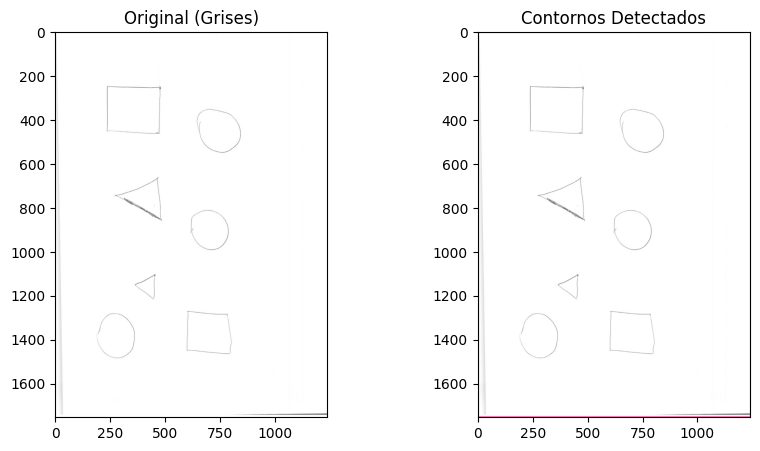

In [10]:
from matplotlib import pyplot as plt
import numpy as np  # Lo estándar es 'np', no 'numpy'
import cv2 as cv
import os

ruta_imagen = "../../docs/Escaneo-cargador.jpg"

# Verificación 
if not os.path.exists(ruta_imagen):
    print(f"ERROR: No encuentro la imagen en: {ruta_imagen}")
else:
    # Cargamos en escala de grises (0)
    # /TODO findContours necesita una imagen binaria o en escala de grises:D ACORDARSE
    img = cv.imread(ruta_imagen, 0)

    if img is None:
        print("ERROR: La imagen no se pudo abrir.")
    else:
        # 2. BUSCAR CONTORNOS
        # cv.RETR_EXTERNAL: Solo los bordes de fuera (ignora agujeros dentro)
        # cv.CHAIN_APPROX_SIMPLE: Ahorra memoria guardando solo puntos clave
        cnts, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        
        print(f"Número de contornos detectados: {len(cnts)}")

        # 3. PREPARAR PARA DIBUJAR
        # La imagen 'img' es de 1 canal (Grises). No podemos pintar verde (3 canales) sobre ella.
        # Convertimos de Gris a BGR para poder pintar colores.
        imagen_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

        # 4. DIBUJAR CONTORNOS
        # -1 significa "todos los contornos"
        # (0, 255, 0) es el color Verde en BGR
        # 5 es el grosor de la línea
        cv.drawContours(imagen_color, cnts, -1, (180, 105, 255), 5)

        plt.figure(figsize=(10, 5))

        # Imagen Original 
        plt.subplot(1, 2, 1)
        plt.title("Original (Grises)")
        plt.imshow(img, cmap='gray')

        # Imagen con Contornos 
        plt.subplot(1, 2, 2)
        plt.title("Contornos Detectados")
        # /TODO Matplotlib espera RGB, pero OpenCV usa BGR:/
        # Hacemos la conversión final para que el verde se vea verde.
        imagen_rgb = cv.cvtColor(imagen_color, cv.COLOR_BGR2RGB)
        plt.imshow(imagen_rgb)

        plt.show()